# Import Tricks: Remote Modules, and Importing Notebooks
<br>Author(s): **Phil Marshall** ([@drphilmarshall](https://github.com/LSSTScienceCollaborations/StackClub/issues/new?body=@drphilmarshall)) 
<br>Maintainer(s): **Alex Drlica-Wagner** ([@kadrlica](https://github.com/LSSTScienceCollaborations/StackClub/issues/new?body=@kadrlica)) 
<br>Last Verified to Run: **2021-03-31**
<br>Verified Stack Release: **21.0.0**

### Learning Objectives:

After working through this tutorial you should be able to: 
1. Use the `stackclub.wimport` function to import a python module from the web;
2. Import a notebook as a module, following an `import stackclub`
3. Understand the current limitations of these utilities

### Logistics
This notebook is intended to be runnable on `lsst-lsp-stable.ncsa.illinois.edu` from a local git clone of https://github.com/LSSTScienceCollaborations/StackClub.

## Set-up

You can find the Stack version that this notebook is running by using eups list -s on the terminal command line:

In [1]:
# What version of the Stack are we using?
! echo $HOSTNAME
! eups list -s | grep lsst_distrib

nb-kadrlica-r21-0-0
lsst_distrib          21.0.0+973e4c9e85 	current v21_0_0 setup


We'll need the `stackclub` package to be installed. If you are not developing this package, you can install it using `pip`, like this:
```
pip install git+git://github.com/LSSTScienceCollaborations/StackClub.git#egg=stackclub
```
If you are developing the `stackclub` package (eg by adding modules to it to support the Stack Club tutorial that you are writing, you'll need to make a local, editable installation. In the top level folder of the `StackClub` repo, do:

In [2]:
! cd .. && python setup.py -q develop --user && cd -

/home/kadrlica/notebooks/.beavis/StackClub/GettingStarted


When editing the `stackclub` package files, we want the latest version to be imported when we re-run the import command. To enable this, we need the %autoreload magic command.

In [3]:
%load_ext autoreload
%autoreload 2

For this tutorial we'll need the following modules:

In [4]:
import stackclub

## Importing Python Modules from the Web

Sometimes we may want to import a python module without installing an entire package - eg. from a GitHub gist. We can do that by first downloading it and then importing it: this is what the `stackclub.wimport` function does.

In [5]:
# %load -n stackclub.wimport

For example, suppose the ``stackclub`` library did _not_ include the `where_is` module: we could still download it and import it, like this:    

In [6]:
where_is_url = "https://github.com/LSSTScienceCollaborations/StackClub/raw/master/stackclub/where_is.py"
so = stackclub.wimport(where_is_url, vb=True)

Imported external module 'where_is' (downloaded from https://github.com/LSSTScienceCollaborations/StackClub/raw/master/stackclub/where_is.py and stored in .downloads/where_is.py)


In [7]:
print(so)

<module 'where_is' from '.downloads/where_is.py'>


In this example, `so` is an imported module - so we can invoke it's functions as normal.

In [8]:
from lsst.daf.persistence import Butler
so.where_is(Butler.get, in_the='source')

[`lsst.daf.persistence.butler`](https://github.com/lsst/daf_persistence/blob/master/python/lsst/daf/persistence/butler.py)

[`lsst.daf.persistence.butler`](https://github.com/lsst/daf_persistence/blob/master/python/lsst/daf/persistence/butler.py)


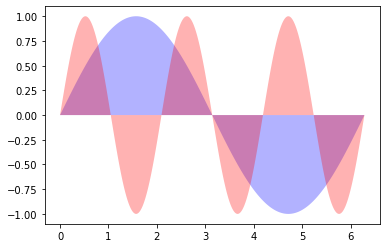

Imported external module 'fill_demo_features' (downloaded from https://matplotlib.org/mpl_examples/lines_bars_and_markers/fill_demo_features.py and stored in .downloads/fill_demo_features.py)


In [9]:
mpl_url = "https://matplotlib.org/mpl_examples/lines_bars_and_markers/fill_demo_features.py"
mpl = stackclub.wimport(mpl_url, vb=True)

Here's another example - a simple python gist:

## Importing Notebooks as Modules

Sometimes we will come across Jupyter notebooks that contain functions and classes that we can re-use. Rather than duplicating the code, we can import the other notebook (ie, run it), and then call the function or class as it is. 

The ability to import notebooks as modules is enabled by the `import stackclub` statement, which sets up a new "loader" that can handle Jupyter notebooks. Here's a demo, using the `HelloWorld` notebook that is also in this folder:

In [10]:
import stackclub
import HelloWorld as Yo

Importing code from Jupyter notebook HelloWorld.ipynb


In [11]:
Yo.take_that_first_baby_step(and_follow_up="I'm using code imported from a notebook!")

Hello World I'm using code imported from a notebook!


## Current Limitations

At present, it is not possible to `wimport` a Jupyter notebook. But this would be very useful functionality to have, indeed!

## Summary

You should now be able to import and use remote modules with the `stackclub.wimport` function, and import local notebooks (in the current working directory) as modules.